# 3. Unsupervised Learning

![AI](../img/3/images.jpg)
Source: https://www.cartoonstock.com/
![AI](../img/3/main.png)
Source: https://prateekvjoshi.com/tag/pattern-recognition/

## 3.1 Definitions and Terminology

### What is Unsupervised Learning?

![Algorithms](../img/algos.png)
Source: https://twitter.com/fuzzysynapse/status/930716639041146880

A class of machine learning (ML) used to detect patterns in data without any labels.
Only input variables (X) available, no output variable (Y).

**Unsupervised learning** algorithms discover underlying hidden structures in data. The learning process is independent. 
[Wikipedia](https://en.wikipedia.org/wiki/Unsupervised_learning)

> Unsupervised learning — teaching machines to learn for themselves without having to be explicitly told if everything 
> they do is right or wrong — is the key to “true” AI." <cite> Yann Lecun </cite>

![UL](../img/3/UL.jpg)

**An example**: 
Source: http://angrybirdsriogame.info/?d=Differences+Between+Supervised+Learning+and+Unsupervised

If you take a test, there are questions and answers. Your grade is determined by how closely your answers match the answer key. But what if there was no answer key? How would you grade yourself?

In ML, datasets typically follow logic X -> Y. We might want to find if increase in ice-cream sales (X) cause a decrease in crime rates (Y), for instance. In unsupervised learning, there are no crime rates available! We just have the input data X.

Important Terminology:

* Feature: An input variable used in making predictions (X).
* Predictions: A model's output when provided with an input example (Y).
* Example: One row of a data set. It has one or more features and possibly a label.
* Label: Result of the feature.


## 3.2 Supervised vs Unsupervised Learning

![ML](../img/3/ML.png)

Source: https://blog.algorithmia.com/introduction-to-unsupervised-learning/

In supervised learning, previous examples of labelled datasets are used as the basis to learn from. In unsupervised learning, attempts are made to detect patterns directly from the available example as no labelled datasets are provided. 

![Supervised vs Unsupervised](../img/3/supvsunsup.png)
Source: http://beta.cambridgespark.com/courses/jpm/01-module.html

The left image is an example of supervised learning; regression techniques are used to find the line of best fit between the features. In unsupervised learning, the inputs are segregated based on features and the prediction is based on which cluster it belongs to.


## 3.3 Why use Unsupervised Learning?

![Customer Segmentation](../img/3/customer-segmentation.jpg)
Source: https://www.analyticsvidhya.com/blog/2018/05/essentials-of-deep-learning-trudging-into-unsupervised-deep-learning/

Examples of where unsupervised learning is useful:
- An advertising platform segments the population into smaller groups with similar demographics, lifestyles, and purchasing habits so that advertisers can reach their target market with relevant ads. This helps advertisers to understand their existing customer base and use their ad spend effectively by targeting potential new customers.
- Companies like Airbnb group housing listings into neighborhoods so that users can navigate listings better. 
- A data science team reduces the number of dimensions in a large data set to simplify modelling and reduce file size.


## 3.4 Preparing Data for Unsupervised Learning

We will use the Iris dataset for our predictions. The dataset contains a set of 150 records under 5 attributes  —  Petal Length, Petal Width, Sepal Length, Sepal Width and Class. Iris Setosa, Iris Virginica and Iris Versicolor are the 3 classes. We provide these 4 features of the Iris flower and predict which class it belongs to.

We use sklearn library in Python 3 to load the dataset, and matplotlib for data visualisation. 

['DESCR', 'data', 'feature_names', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


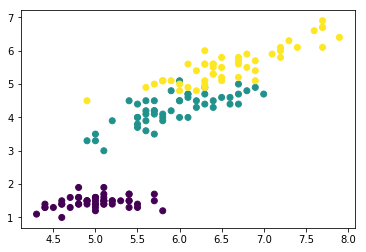

In [9]:

# Importing Python Modules
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset
iris_df = datasets.load_iris()

# Available methods on dataset
print(dir(iris_df))

# Features
print(iris_df.feature_names)

# Targets
print(iris_df.target)

# Target Names
print(iris_df.target_names)
label = {0: 'red', 1: 'blue', 2: 'green'}

# Dataset Slicing
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 2]  # Sepal Width

# Plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

In [29]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pandas as pd
init_notebook_mode(connected=True)
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
df.head()

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(df['Name'].unique())):
    name = df['Name'].unique()[i]
    color = colors[i]
    x = df[ df['Name'] == name ]['SepalLength']
    y = df[ df['Name'] == name ]['SepalWidth']
    z = df[ df['Name'] == name ]['PetalLength']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-iris', validate=False)

plotly.offline.plot(fig, filename='pandas-3d-iris.html', validate=False)

'file://C:\\Users\\Shayanti\\Desktop\\ML_Course\\pandas-3d-iris.html'


## 3.5 Types of Unsupervised Learning

* Clustering
* Dimensionality Reduction
* Anomaly Detection
* Autoencoders
* Deep Belief Nets
* Generative Adversarial Networks(GANs)
* Self-Organizing maps


### 3.5.1 Clustering

In clustering, the data gets divided into several groups or clusters according to similar traits. Items in a cluster would be more similar to each other than items in other clusters. It's up to us to interpret the results: value is created when humans create meaning using the findings.

Companies like ours need to understand their customers. Customers could be divided into groups according to some set criteria (age, gender, user history) using unsupervised learning. Clustering algorithms find natural groupings in data if they exist. For us, this might mean one cluster of 30-something traders and another of millennials who own hedge funds. We can specify how many clusters we want to find, hence modifying the granularity of these groups. 

![Clusters](../img/3/clusters.jpeg)
Source: https://medium.com/the-21st-century/machine-learning-a-strategy-to-learn-and-understand-chapter-3-9daaad4afc55

The left image shows raw data where the classification isn't done; the right image shows clustered data. A new input is classified into one of these clusters based on features and a prediction is made.

There are several types of clustering. We'll explore two of the most common forms of clustering: k-means and hierarchical.

#### Make your own clusters

(-15, 15)

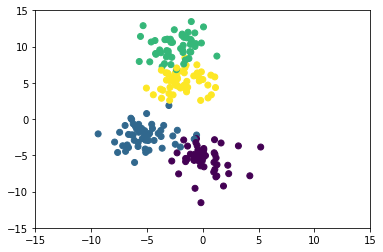

In [8]:

# import libraries
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)


### 3.5.1.1 K-Means Clustering 

Involves clustering data points into K mutually exclusive clusters. Choosing the desired number for K can be complex. A larger k creates smaller groups with more granularity, a lower k means larger groups and less granularity.
If we know that there are 3 classes involved, we set the algorithm to group the data into 3 classes. Randomly, 3 points are assigned to 3 clusters. Based on the centroid distance between points, the next inputs are segregated into the clusters. 

Each centroid of a cluster is a collection of feature values which define the resulting groups. The centroids are like the heart of the cluster, they “capture” the points closest to them and add them to the cluster. The centroids are recalculated for all the clusters. Think of these as the people who show up at a party and soon become the centers of attention because they’re so magnetic. If there’s just one of them, everyone will gather around; if there are lots, many smaller centers of activity will form. The output of the clustering algorithm would be a set of labels assigning each data point to one of the k groups. 

Steps in k-means clustering:
1. Define the k centroids. Initialize these at random (other algorithms also exist for initialising the centroids that end up converging more effectively).
2. Find the closest centroid & update cluster assignments. Assign each data point to one of the k clusters. Each data point is assigned to the nearest centroid's cluster. Measure of "nearness" is a hyperparameter — often Euclidean distance.
3. Move the centroids to the center of their clusters. The new position of each centroid is calculated as the average position of all the points in its cluster.
4. Keep repeating steps 2 and 3 until the centroids stop moving a lot at each iteration, until the algorithm converges.

Another application of k-means clustering is classifying handwritten digits. Suppose we have digits' images as vectors of pixel brightnesses. Let's say the images are black and white with 64x64 pixels. Each pixel represents a dimension. k-means clustering allows us to group the images that are close together, achieving good results for digit recognition.

In [15]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Loading dataset
iris_df = datasets.load_iris()

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(iris_df.data)

# Predicitng a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(iris_df.data)

# Printing Predictions
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]



### 3.5.1.2 Hierarchical Clustering

It is an algorithm that builds a hierarchy of clusters. All the data is first assigned to a cluster of their own. Then the 2 closest clusters are joined into the same cluster. The algorithm ends when there is only a single cluster left. The completion of hierarchical clustering is shown using dendrograms. 

It clusters data points into parent and child clusters. We can divide our customers into younger and older ages, and then split each of those groups into further individual clusters as well. In addition to cluster assignments, we also build a nice tree that tells us about the hierarchies between the clusters. We can then pick the number of clusters we want from this tree.

Hierarchical clustering is similar to regular clustering, except that you build a hierarchy of clusters. This is useful if you want flexibility in how many clusters you ultimately want. For example, imagine grouping items on an online marketplace like Etsy or Amazon. On the homepage you'd want a few broad categories of items for simple navigation, but as you go into more specific categories, you'd want increasing levels of granularity or more distinct clusters of items.

Here are the steps for hierarchical clustering:
1. Start with N clusters, one for each data point.
2. Merge the two clusters that are closest to each other. Now you have N-1 clusters.
3. Recompute the distances between the clusters. There are several ways to do this (see this tutorial for more details). One of them (called average-linkage clustering) is to consider the distance between two clusters to be the average distance between all their respective members.
4. Repeat steps 2 and 3 until you get one cluster of N data points. You get a tree (also known as a dendrogram) like the one below.
5. Pick a number of clusters and draw a horizontal line in the dendrogram. For example, if you want k=2 clusters, you should draw a horizontal line around “distance=20000.” You’ll get one cluster with data points 8, 9, 11, 16 and one cluster with the rest of the data points. In general, the number of clusters you get is the number of intersection points of your horizontal line with the vertical lines in the dendrogram.

Now we see an example of hierarchical clustering of grain data. 

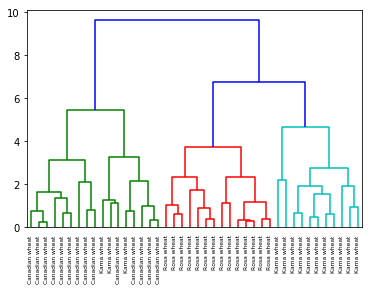

In [16]:

# Importing Python Modules
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Reading the DataFrame
seeds_df = pd.read_csv(
    "https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# Extract the measurements as a NumPy array
samples = seeds_df.values

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()


### Difference between K Means and Hierarchical clustering

* Hierarchical clustering can't handle big data well but K means clustering can. This is because the time complexity of K means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).

* Results are reproducible in hierarchical clustering. In K means clustering, as we start with an arbitrary choice of clusters, the results generated by running the algorithm multiple times might differ. 

* K means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).

* K-Means doesn't allow noisy data, while in hierarchical we can directly use noisy dataset for clustering.

* Hierarchical clustering tends to produce more accurate results compared to k-means clustering. The downside is that hierarchical clustering is more difficult to implement and more time/resource consuming than k-means.


### 3.5.1.3 t-SNE Clustering

t-SNE (t-distributed stochastic neighbor embedding) is one of the unsupervised learning methods for visualisation. It maps high dimensional space into a 2 or 3 dimensional space which can be visualised. Specifically, it models each high-dimensional object by a 2 or 3-dimensional point in such a way that similar objects are modelled by nearby points and dissimilar objects are modelled by distant points with high prob 2-dimensional figure. 

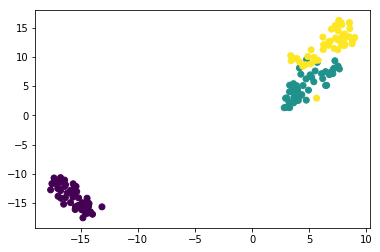

In [17]:

# Importing Python Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loading dataset
iris_df = datasets.load_iris()

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(iris_df.data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()


### 3.5.1.4 Probabilistic Clustering

Clusters data points into clusters on a probabilistic scale.

### 3.5.1.5 DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used as an replacement to K-means in predictive analytics. It doesn't require the number of clusters but we need to tune 2 other parameters.

The scikit-learn implementation provides a default for the eps and min_samples parameters, but we need to tune those. The eps parameter is the maximum distance between two data points to be considered in the same neighborhood. The min_samples parameter is the minimum amount of data points in a neighborhood to be considered a cluster.

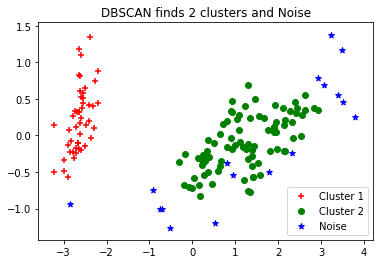

In [18]:

# Importing Python Modules
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load Dataset
iris = load_iris()

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(iris.data)

# Transoring Using PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()


## 3.5.2 Dimensionality Reduction

Running algorithms on only data that's necessary is sensible. Unsupervised learning can help with dimensionality reduction and reduce data complexity while maintaining data structure and usefulness. Reducing dimensionality of data is an important part of a good machine learning pipeline and resembles compression. In computer vision, reducing the size of training set by an order of magnitude by running algorithms on images would significantly lower compute and storage costs while making models run faster. 

Dimensionality reduction (dimensions or how many columns are in your dataset) assumes that a lot of data is redundant, and that most of the information in a dataset can be represented by only a fraction of it. This means combining parts of the data to convey maximum information. 

Algorithms to reduce dimensionality:

Principal Component Analysis (PCA): finds the linear combinations that conveys most of the variance in your data.
Singular-Value Decomposition (SVD): decomposes data into product of smaller matrices.
These methods use linear algebra to break down a matrix into more informatory pieces.

We'll take a look at one common technique in practice: principal component analysis.


### 3.5.2.1 Principal Components Analysis

Imagine a high-dimensional space such as 50K dimensions. We can select the most significant principal components by looking at how much of the data's variance they capture and ordering them by that metric. The subset we select will constitute a new space that is smaller in dimensionality than the original space but maintains as much of the complexity of the data as possible. PCA remaps the space in which our data exists to make it more compressible. The transformed dimension is smaller than the original dimension. By making use of the first several dimensions of the remapped space only, we can start gaining an understanding of the dataset's organisation. This is the promise of dimensionality reduction: reduce complexity (dimensionality in this case) while maintaining structure (variance). Another common application of PCA is for data visualisation.

The original Iris dataset has 4 columns: sepal length, sepal width, petal length, and petal width. The following code projects the original data which is 4 dimensional into 2 dimensions. After dimensionality reduction, there isn’t a particular meaning assigned to each principal component typically. The new components are just the 2 main dimensions of variation. The different classes seem well separated from each other.

The explained variance feature tells us how much information (variance) can be attributed to each of the principal components. This is important as converting 4 dimensional space to 2 dimensional space can lose some of the variance (information). Here, the first principal component contains 92.46% of the variance and the second principal component contains 5.30% of the variance. Together, the two components contain 97.76% of the total information.

explained variance ratio (first two components): [0.92461621 0.05301557]


Text(0.5,1,'PCA of IRIS dataset')

<Figure size 432x288 with 0 Axes>

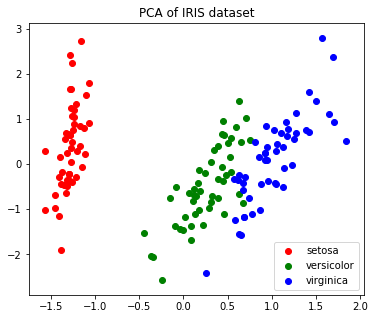

In [13]:

# Load the iris data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Fit a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# Project the data in 2D
X_pca = pca.transform(X)

# Visualize the data
plt.figure()
lw = 2 
target_ids = range(len(iris.target_names))
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')


## 3.6 Advantages of Unsupervised Learning

* Supervised learning is constrained by the biases in which it is being supervised in - it cannot think of other corner cases that could occur when solving the problem.

* Also, huge manual effort is required to create labels in supervised learning. The less the number of labels created, less is the training that can be perform for your algorithm.


## 3.7 Challenges of Unsupervised Learning

Unsupervised learning presents a unique challenge: it's difficult to know if we're getting the right answers without an answer key. In supervised learning, metrics like precision and recall reveal how accurate our model is, and model parameters are tuned to improve accuracy scores. With absence of labels in unsupervised learning, we can't objectively measure how accurate our algorithm is. How do we know if K-Means found the right clusters or even the right number of clusters? 

If unsupervised learning is right for the job depends on your business context. "Performance" is often subjective and domain-specific. In customer segmentation, clustering will only work well if your customers actually do split into natural groups. One of the best but risky ways to test an unsupervised learning model is by implementing it in the real world and seeing what happens. Designing an A/B test, with and without the clusters our algorithm outputted, can be an effective way to see if it's useful information or totally incorrect.

![Robots](../img/3/robots.jpg)
Source: www.cartoonstock.com

#### 3.8 Unsupervised Deep Learning

Deep Learning techniques are usually most powerful when a lot of unstructured data is present. 

Categorize smartphone photos into groups: memes, Reddit quotes, interesting facts, conference meetings, whiteboard scribbles, code screenshots, personal photos, greetings. Group by date, location, or...? Extract semantic meaning from scenery, type of objects seen, using images from the web. 

![Meme](../img/3/meme.jpg)
Source: https://www.analyticsvidhya.com/blog/2018/05/essentials-of-deep-learning-trudging-into-unsupervised-deep-learning/

## Any Questions?

![AI](../img/3/AI.jpg)
Source: https://www.pinterest.com/TechSeeAugmentedVision/artificial-intelligence/